In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('edge_flower.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Adding Text

In [3]:
text_img = img.copy()
text_img = cv2.putText(
    text_img,
    'OpenCV Demo',
    (50, 50),
    cv2.FONT_HERSHEY_SIMPLEX,
    1,
    (0, 255, 0),
    2
)

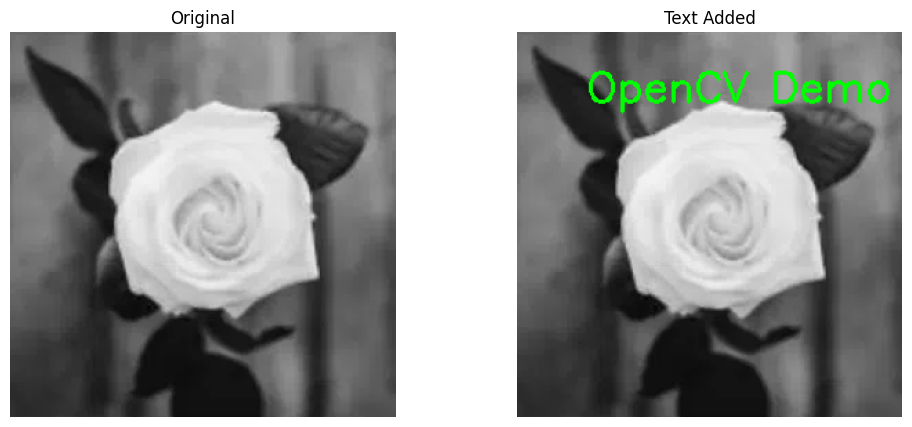

In [4]:
plt.figure(figsize=[12,5])
plt.subplot(121); plt.imshow(img); plt.title('Original'); plt.axis('off')
plt.subplot(122); plt.imshow(text_img); plt.title('Text Added'); plt.axis('off')
plt.show()

## Layering images & transparency

In [5]:
img1 = cv2.imread('coca-cola-logo.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [6]:
img2 = cv2.imread('logo_final.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [7]:
overlay = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)

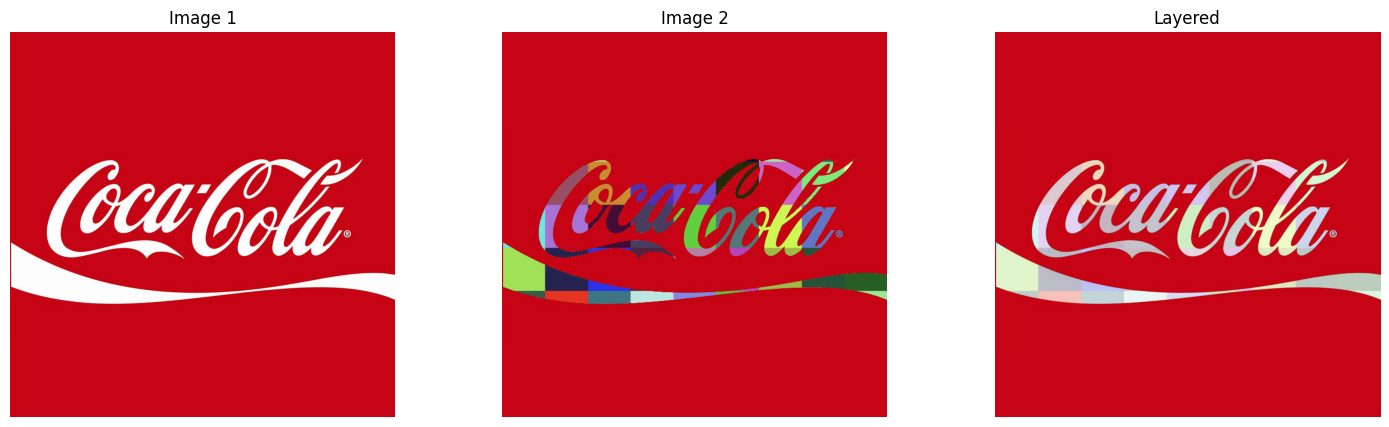

In [8]:
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img1); plt.title('Image 1'); plt.axis('off')
plt.subplot(132); plt.imshow(img2); plt.title('Image 2'); plt.axis('off')
plt.subplot(133); plt.imshow(overlay); plt.title('Layered'); plt.axis('off')
plt.show()

## Contours

In [9]:
image = cv2.imread('image_of_3_boxes.png')

In [10]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [11]:
edged = cv2.Canny(gray, 30, 200)

In [12]:
contours, hierarchy = cv2.findContours(edged,
                                      cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

Text(0.5, 1.0, 'edges detected')

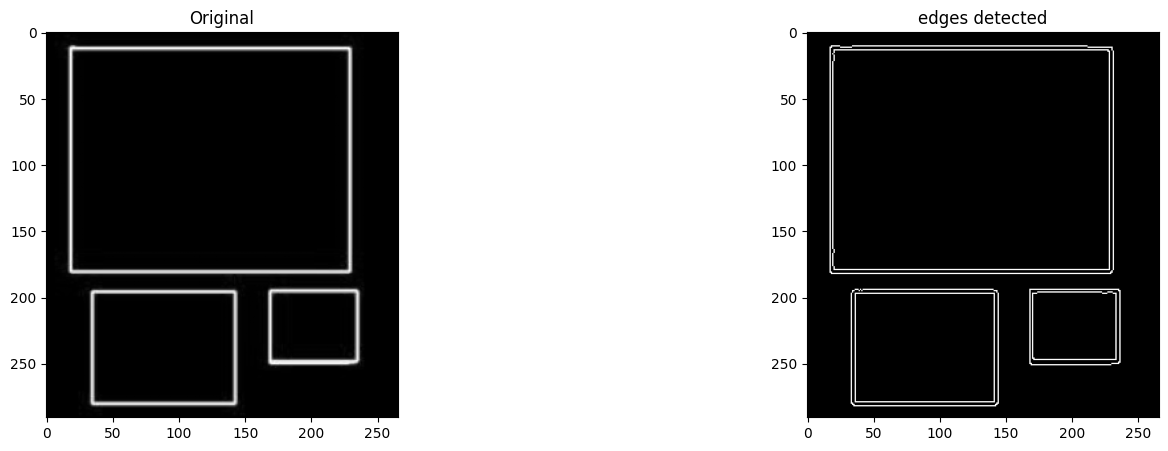

In [13]:
plt.figure(figsize=[18,5])


plt.subplot(121);plt.imshow(gray, cmap='gray');plt.title('Original')
plt.subplot(122);plt.imshow(edged, cmap='gray'); plt.title('edges detected')

In [14]:
count = len(contours)

print('Number of contours Found = ', count)

Number of contours Found =  3


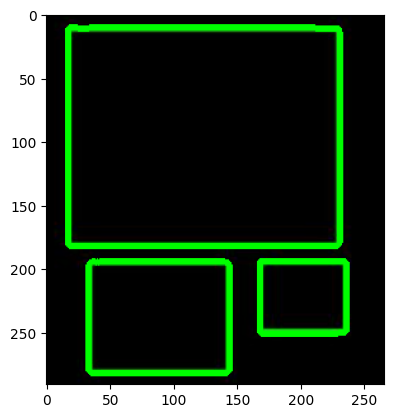

In [15]:
cv2.drawContours(image, contours, -1, (0,255,0), 3)
plt.imshow(image)

## Contour Detection

In [16]:
image = cv2.imread('contour_detection_img.png')

img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

True

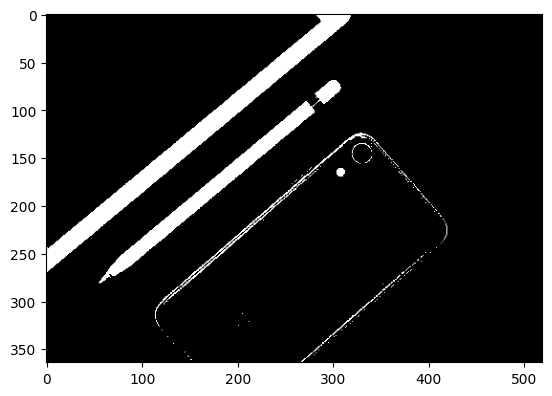

In [17]:
#apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray')
cv2.imwrite('image_thres1.jpg', thresh)

### drawing contours

True

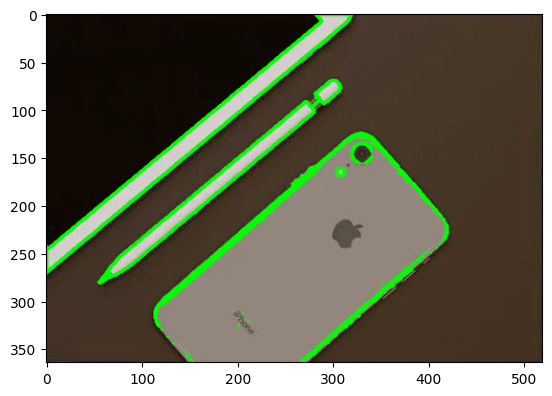

In [18]:
contours, heirarchy = cv2.findContours(
    image = thresh,
    mode = cv2.RETR_TREE,
    method = cv2.CHAIN_APPROX_NONE
)

image_copy = image.copy()
cv2.drawContours(
    image = image_copy,
    contours = contours,
    contourIdx = -1,
    color = (0,255,0),
    thickness=2,
    lineType = cv2.LINE_AA
)


plt.imshow(image_copy, cmap='gray')
cv2.imwrite('contours_none_image.jpg', image_copy)

### Using Single Channel: Red, Green, Blue

In [19]:
raw_image = image.copy()

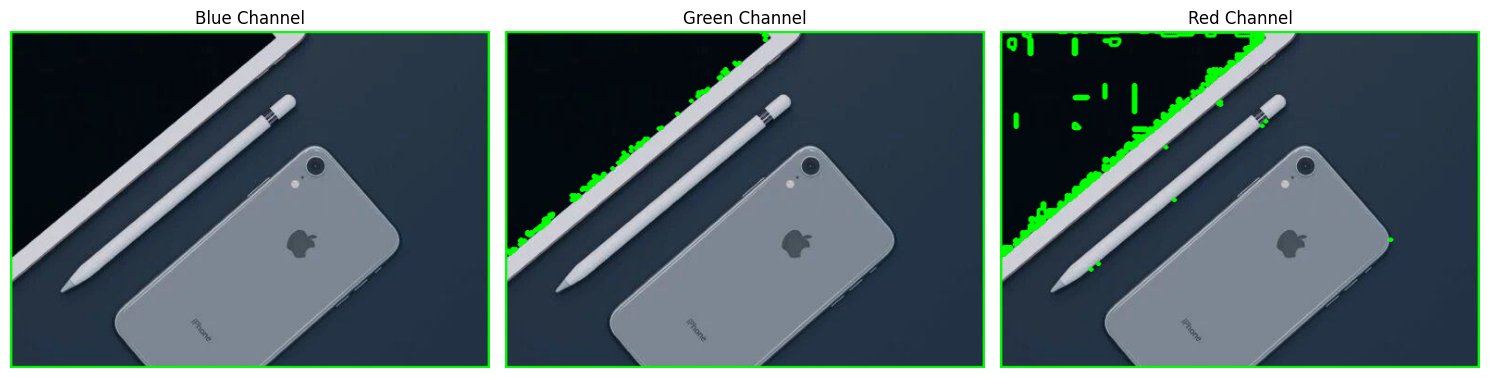

In [20]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

blue, green, red = cv2.split(image)
channels = [
    ("Blue Channel", blue),
    ("Green Channel", green),
    ("Red Channel", red)
]

# Create figure
plt.figure(figsize=(15, 5))

for i, (title, channel) in enumerate(channels, 1):
    # Find contours
    contours, hierarchy = cv2.findContours(
        channel,
        cv2.RETR_TREE,
        cv2.CHAIN_APPROX_NONE
    )

    # Draw contours
    img_contour = image_rgb.copy()
    cv2.drawContours(
        image=img_contour,
        contours=contours,
        contourIdx=-1,
        color=(0, 255, 0),
        thickness=2,
        lineType=cv2.LINE_AA
    )

    # Display
    plt.subplot(1, 3, i)
    plt.imshow(img_contour)
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()

not able to find the contours properly. This is because it is not able to detect the borders of the objects properly, and also the intensity difference between the pixels is not well defined. This is the reason we prefer to use a grayscale, and binary thresholded image for detecting contours.

### Drawing Contours using CHAIN_APPROX_SIMPLE

True

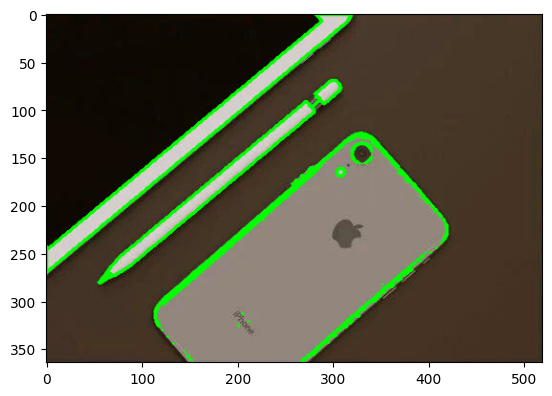

In [21]:
contours1, hierarchy1 = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw contours on the original image for `CHAIN_APPROX_SIMPLE`
image_copy1 = image.copy()
cv2.drawContours(image_copy1, contours1, -1, (0, 255, 0), 2, cv2.LINE_AA)

plt.imshow(image_copy1, cmap='gray')
cv2.imwrite('contours_simple_image1.jpg', image_copy1)

## Shape matching

In [22]:
def bin_img(image):
    img = cv2.imread(image)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    binary_img = cv2.threshold(gray_img, 50, 255, cv2.THRESH_BINARY_INV)[1]
    plt.imshow(binary_img, cmap='gray')
    return binary_img

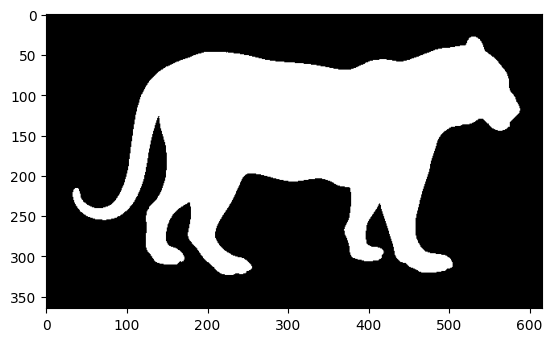

In [23]:
tiger1 = bin_img('tiger1.jpg')

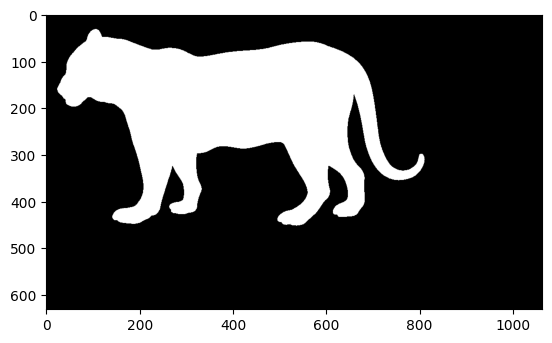

In [24]:
tiger2 = bin_img('tiger2.jpg')

In [26]:
contour1, heirarchy = cv2.findContours(tiger1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour2, heirarchy = cv2.findContours(tiger2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [28]:
cont_diff = cv2.matchShapes(contour1[0], contour2[0], cv2.CONTOURS_MATCH_I1, 0)
cont_diff

0.0077114914335052465

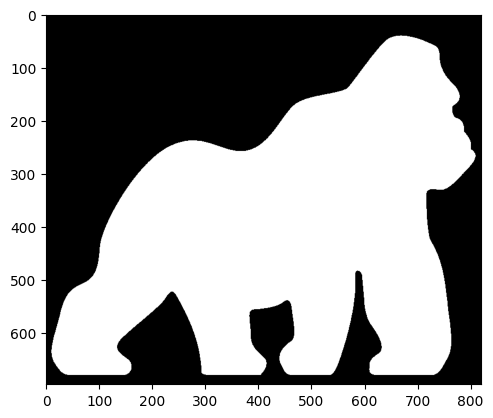

In [29]:
gorilla = bin_img('gorilla.png')
contour3, heirarchy = cv2.findContours(gorilla, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [30]:

cont_diff = cv2.matchShapes(contour1[0], contour3[0], cv2.CONTOURS_MATCH_I1, 0)
cont_diff

0.553126707534437

## Image Gradients

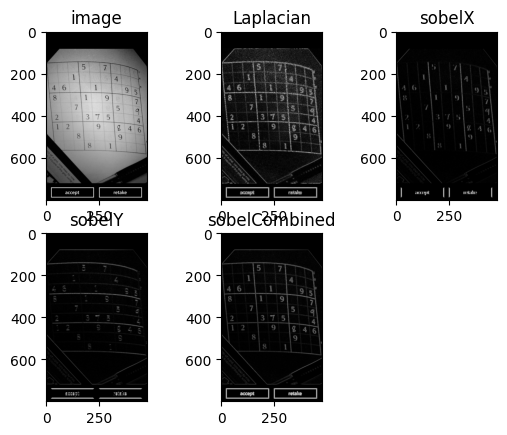

In [2]:
img = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)

sobelX = np.uint(np.absolute(sobelX))
sobelY = np.uint(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined']
images = [img, lap, sobelX, sobelY, sobelCombined]
for i in range(5):
    plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])

plt.show()